[link paper](https://europepmc.org/article/MED/22319055)  
[link GEO](https://www.ebi.ac.uk/gxa/experiments/E-GEOD-34476/Results)

In [1]:
library(BiocManager)
library(Rsubread)
library(Rbowtie2)
library(Rsamtools)
library(dplyr)
library(org.At.tair.db)
library(pheatmap)
library(GO.db)
library(pathview)
library(KEGGgraph)
library(DESeq2)
library(ggplot2)

Loading required package: GenomeInfoDb

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Att

In [3]:
bowtie2_build("AthalianaChr4.fasta", bt2Index = "index/" , overwrite = TRUE)

Warning message in checkFileCreatable(paste0(bt2Index, ".1.bt2"), "bt2Index", overwrite):
“For argument `bt2Index`, file exist:index/.1.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".2.bt2"), "bt2Index", overwrite):
“For argument `bt2Index`, file exist:index/.2.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".3.bt2"), "bt2Index", overwrite):
“For argument `bt2Index`, file exist:index/.3.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".4.bt2"), "bt2Index", overwrite):
“For argument `bt2Index`, file exist:index/.4.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".rev.1.bt2"), "bt2Index", :
“For argument `bt2Index`, file exist:index/.rev.1.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".rev.2.bt2"), "bt2Index", :
“For argument `bt2Index`, file exist:index/.rev.2.bt2. It will be overwrited”
arguments 'show.outp

In [3]:
bowtie2(bt2Index = "index/", 
        samOutput = "SRR390310.sam", 
        seq1 = "SRR390310_1.fastq", 
        seq2 = "SRR390310_2.fastq", 
        "--threads=3")

arguments 'show.output.on.console', 'minimized' and 'invisible' are for Windows only



In [4]:
asBam("SRR390310.sam")

[1] "SRR390310.bam"

In [3]:
library(R.utils)

In [4]:
library(Rsubread)

In [5]:
bowtie2_build("dir_path_reference.fa", bt2Index = "dir_path_directory", overwrite =TRUE)

bowtie2(bt2Index = "dir_path_directory", 
        samOutput = "file.sam", 
        seq1 = "fastq_1.fastq", 
        seq2 = "fastq_2.fastq", 
        "--threads=3")

asBam("file.sam")

library(Rsubread)

file.show("file.gff3")
bamfiles <- list.files(path = "star_bam", 
                       pattern = "*.bam$", 
                       full.names = TRUE)

data <- featureCounts( files = bamfiles, annot.ext = "path_to_gff3", 
                      isGTFAnnotation = TRUE, 
                      GTF.featureType = "gene", 
                      GTF.attrType = "ID", 
                      isPairedEnd = FALSE, 
                      requireBothEndsMapped = FALSE, 
                      minMQS = 20, 
                      strandSpecific = 2 )

data$counts

write.table(data$counts , file = "raw_counts.txt", sep = "\t")




ERROR: Error in checkFileExist(references, "references"): For argument `references`, file does not exist: `dir_path_reference.fa`


In [6]:
bamfilesSE <- list.files(path = "Star_bam/SE", 
                       pattern = "*.bam$", 
                       full.names = TRUE )

bamfilesPE <- list.files(path = "Star_bam/PE", 
                       pattern = "*.bam$", 
                       full.names = TRUE )

In [7]:
bamfilesSE

[1] "Star_bam/SE/SRR390302_sortedByCoord.out.bam"
 [2] "Star_bam/SE/SRR390303_sortedByCoord.out.bam"
 [3] "Star_bam/SE/SRR390304_sortedByCoord.out.bam"
 [4] "Star_bam/SE/SRR390306_sortedByCoord.out.bam"
 [5] "Star_bam/SE/SRR390307_sortedByCoord.out.bam"
 [6] "Star_bam/SE/SRR390308_sortedByCoord.out.bam"
 [7] "Star_bam/SE/SRR390309_sortedByCoord.out.bam"
 [8] "Star_bam/SE/SRR390311_sortedByCoord.out.bam"
 [9] "Star_bam/SE/SRR390312_sortedByCoord.out.bam"
[10] "Star_bam/SE/SRR390313_sortedByCoord.out.bam"

In [8]:
data1 <- featureCounts( files = bamfilesSE, 
                      annot.ext = "GCF_000001735.4_TAIR10.1_genomic.gff", 
                      isGTFAnnotation = TRUE, 
                      GTF.featureType = "gene", 
                      GTF.attrType = "ID", 
                      isPairedEnd = FALSE, 
                      requireBothEndsMapped = FALSE, 
                      minMQS = 20, 
                      strandSpecific = 2 )


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.6.4

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                                                                            ||
||                           SRR390302_sortedByCoord.out.bam                  ||
||                           SRR390303_sortedByCoord.out.bam                  ||
||                           SRR390304_sortedByCoord.

In [10]:
data2 <- featureCounts( files = bamfilesPE, 
                      annot.ext = "GCF_000001735.4_TAIR10.1_genomic.gff", 
                      isGTFAnnotation = TRUE, 
                      GTF.featureType = "gene", 
                      GTF.attrType = "ID", 
                      isPairedEnd = TRUE, 
                      requireBothEndsMapped = TRUE, 
                      minMQS = 20, 
                      strandSpecific = 2 )


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.6.4

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 3 BAM files                                      ||
||                                                                            ||
||                           SRR390305_sortedByCoord.out.bam                  ||
||                           SRR390310_sortedByCoord.out.bam                  ||
||                           SRR390314_sortedByCoord.

In [8]:
data$counts

,SRR390302_sortedByCoord.out.bam,SRR390303_sortedByCoord.out.bam,SRR390304_sortedByCoord.out.bam,SRR390306_sortedByCoord.out.bam,SRR390307_sortedByCoord.out.bam,SRR390308_sortedByCoord.out.bam,SRR390309_sortedByCoord.out.bam,SRR390311_sortedByCoord.out.bam,SRR390312_sortedByCoord.out.bam,SRR390313_sortedByCoord.out.bam
gene-AT1G01010,7,5,2,14,1,9,3,2,5,1
gene-AT1G01020,5,0,2,2,5,2,10,7,14,19
gene-AT1G03987,1,0,0,0,1,0,0,2,0,1
gene-AT1G01030,1,0,2,0,2,0,2,0,0,4
gene-AT1G01040,13,4,7,8,15,23,32,21,19,37
gene-AT1G03993,0,0,1,0,0,0,2,0,0,3
gene-AT1G01046,0,0,0,0,0,0,0,0,0,0
gene-AT1G01050,2,1,3,0,8,4,4,2,22,21
gene-AT1G03997,0,0,0,0,0,0,1,0,0,0
gene-AT1G01060,7,0,4,1,19,2,23,4,4,17


In [9]:
data2$counts

,SRR390305_sortedByCoord.out.bam,SRR390310_sortedByCoord.out.bam,SRR390314_sortedByCoord.out.bam
gene-AT1G01010,0,0,0
gene-AT1G01020,11,1,301
gene-AT1G03987,0,0,0
gene-AT1G01030,0,0,0
gene-AT1G01040,12,11,29
gene-AT1G03993,0,0,0
gene-AT1G01046,0,0,0
gene-AT1G01050,59,41,121
gene-AT1G03997,0,0,0
gene-AT1G01060,0,1,8


In [11]:
mmg <- merge(data$counts, data2$counts, by = 0)

In [11]:
lis

Row.names,SRR390302_sortedByCoord.out.bam,SRR390303_sortedByCoord.out.bam,SRR390304_sortedByCoord.out.bam,SRR390306_sortedByCoord.out.bam,SRR390307_sortedByCoord.out.bam,SRR390308_sortedByCoord.out.bam,SRR390309_sortedByCoord.out.bam,SRR390311_sortedByCoord.out.bam,SRR390312_sortedByCoord.out.bam,SRR390313_sortedByCoord.out.bam,SRR390305_sortedByCoord.out.bam,SRR390310_sortedByCoord.out.bam,SRR390314_sortedByCoord.out.bam
<I<chr>>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene-ArthCp001,0,0,0,0,0,0,0,0,0,0,0,0,0
gene-ArthCp002,16,1,1,2,0,3,7,0,1,3,4,12,1
gene-ArthCp003,0,0,0,0,0,0,0,0,0,0,0,0,0
gene-ArthCp004,0,0,0,0,1,0,2,0,0,4,0,3,0
gene-ArthCp005,0,0,0,0,0,0,2,1,0,1,0,0,0
gene-ArthCp006,0,0,0,1,1,0,0,1,0,0,0,0,0
gene-ArthCp007,0,0,4,1,13,1,7,0,0,10,1,0,0
gene-ArthCp008,7,2,11,3,58,18,46,11,1,30,0,12,0
gene-ArthCp009,0,2,0,6,1,1,2,1,0,0,0,0,0


In [10]:
write.table(data1$counts , file = "rawSE_counts.txt", sep = "\t")

In [14]:
conteo <- read.table("rawSE_counts.txt", header = TRUE , row.names = 1)

In [15]:
head(conteo)

,SRR390302_sortedByCoord.out.bam,SRR390303_sortedByCoord.out.bam,SRR390304_sortedByCoord.out.bam,SRR390306_sortedByCoord.out.bam,SRR390307_sortedByCoord.out.bam,SRR390308_sortedByCoord.out.bam,SRR390309_sortedByCoord.out.bam,SRR390311_sortedByCoord.out.bam,SRR390312_sortedByCoord.out.bam,SRR390313_sortedByCoord.out.bam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene-AT1G01010,7,5,2,14,1,9,3,2,5,1
gene-AT1G01020,5,0,2,2,5,2,10,7,14,19
gene-AT1G03987,1,0,0,0,1,0,0,2,0,1
gene-AT1G01030,1,0,2,0,2,0,2,0,0,4
gene-AT1G01040,13,4,7,8,15,23,32,21,19,37
gene-AT1G03993,0,0,1,0,0,0,2,0,0,3


In [16]:
data <- conteo
head(data)

,SRR390302_sortedByCoord.out.bam,SRR390303_sortedByCoord.out.bam,SRR390304_sortedByCoord.out.bam,SRR390306_sortedByCoord.out.bam,SRR390307_sortedByCoord.out.bam,SRR390308_sortedByCoord.out.bam,SRR390309_sortedByCoord.out.bam,SRR390311_sortedByCoord.out.bam,SRR390312_sortedByCoord.out.bam,SRR390313_sortedByCoord.out.bam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene-AT1G01010,7,5,2,14,1,9,3,2,5,1
gene-AT1G01020,5,0,2,2,5,2,10,7,14,19
gene-AT1G03987,1,0,0,0,1,0,0,2,0,1
gene-AT1G01030,1,0,2,0,2,0,2,0,0,4
gene-AT1G01040,13,4,7,8,15,23,32,21,19,37
gene-AT1G03993,0,0,1,0,0,0,2,0,0,3


In [17]:
colnames(data) <- gsub("_sortedByCoord.out.bam", "", colnames(data), fixed = T)
colnames(data) <- gsub("_sortedByCoord.out.bam", "", colnames(data), fixed = T)
colnames(data) <- gsub("..", "", colnames(data), fixed = T)
head(data)


,SRR390302,SRR390303,SRR390304,SRR390306,SRR390307,SRR390308,SRR390309,SRR390311,SRR390312,SRR390313
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene-AT1G01010,7,5,2,14,1,9,3,2,5,1
gene-AT1G01020,5,0,2,2,5,2,10,7,14,19
gene-AT1G03987,1,0,0,0,1,0,0,2,0,1
gene-AT1G01030,1,0,2,0,2,0,2,0,0,4
gene-AT1G01040,13,4,7,8,15,23,32,21,19,37
gene-AT1G03993,0,0,1,0,0,0,2,0,0,3


In [18]:
metadata <- read.delim("muestras.txt", row.names = 1)
metadata$sampleid <- row.names(metadata)
metadata <- metadata[match(colnames(data), metadata$sampleid),]
metadata

,Group,Replicate,sampleid
,<chr>,<chr>,<chr>
SRR390302,0day,Rep1,SRR390302
SRR390303,0day,Rep2,SRR390303
SRR390304,0day,Rep3,SRR390304
SRR390306,1day,Rep1,SRR390306
SRR390307,1day,Rep2,SRR390307
SRR390308,1day,Rep3,SRR390308
SRR390309,1day,Rep4,SRR390309
SRR390311,3day,Rep1,SRR390311
SRR390312,3day,Rep2,SRR390312


In [19]:
#condition <- factor(c("A2058","A375","C32","Malme3M","SKMEL28", "SKMEL5","WM2664"))
#design <- as.formula(~Group)

#modelMatrix <- model.matrix(design, data = metadata)
#modelMatrix

ddsMat <- DESeqDataSetFromMatrix(countData = data, 
                                 colData = metadata, 
                                 design = ~Group)
ddsMat <- DESeq(ddsMat)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [133]:
ddsMat.norm <- estimateSizeFactors(ddsMat)

In [120]:
norm.counts <- counts(ddsMat.norm, normalized=TRUE)
mean.counts <- rowMeans(norm.counts)
variance.counts <- apply(norm.counts, 1, var)

In [122]:
dds.disp <- estimateDispersions(ddsMat.norm)
alpha <- 0.05
lfcTH <- 1 
wald.test <- nbinomWaldTest(dds.disp)

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [20]:
# Get results from testing with FDR adjust pvalues
results <- results(ddsMat, pAdjustMethod = "fdr", alpha = 0.05)

# Generate summary of testing. 
summary(results)


out of 31064 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 11, 0.035%
LFC < 0 (down)     : 7, 0.023%
outliers [1]       : 31, 0.1%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [21]:
mcols(results, use.names = T)

DataFrame with 6 rows and 2 columns
                       type            description
                <character>            <character>
baseMean       intermediate mean of normalized c..
log2FoldChange      results log2 fold change (ML..
lfcSE               results standard error: Grou..
stat                results Wald statistic: Grou..
pvalue              results Wald test p-value: G..
padj                results  fdr adjusted p-values

In [22]:
results

log2 fold change (MLE): Group 3day vs 0day 
Wald test p-value: Group 3day vs 0day 
DataFrame with 33460 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat    pvalue
               <numeric>      <numeric> <numeric>  <numeric> <numeric>
gene-AT1G01010  6.835501     -2.6165948  1.264752 -2.0688601 0.0385592
gene-AT1G01020  4.414756      0.7801077  0.950916  0.8203753 0.4120022
gene-AT1G03987  0.439792      0.0450661  2.747162  0.0164046 0.9869116
gene-AT1G01030  1.003159     -1.9254307  2.064011 -0.9328589 0.3508928
gene-AT1G01040 14.659415     -0.0823551  0.619723 -0.1328902 0.8942802
...                  ...            ...       ...        ...       ...
gene-ArthCt118  0.000000             NA        NA         NA        NA
gene-ArthCp083  0.404944       -1.98904   3.70697  -0.536567  0.591567
gene-ArthCt111  0.000000             NA        NA         NA        NA
gene-ArthCp084  0.000000             NA        NA         NA        NA
gene-ArthCp085  0.639211 

In [23]:
results$description <- mapIds( x = org.At.tair.db, keys = row.names(results), column = "GENENAME", keytype = "SYMBOL", multiVals = "first")
results$symbol <- row.names(results)
results$entrez <- mapIds(x = org.At.tair.db, keys= row.names(results), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
results$ensembl <- mapIds(x = org.At.tair.db, keys = row.names(results), column = "ENSEMBL", keytype = "SYMBOL", multiVals = "first")

ERROR: Error in .testForValidKeys(x, keys, keytype, fks): None of the keys entered are valid keys for 'SYMBOL'. Please use the keys method to see a listing of valid arguments.


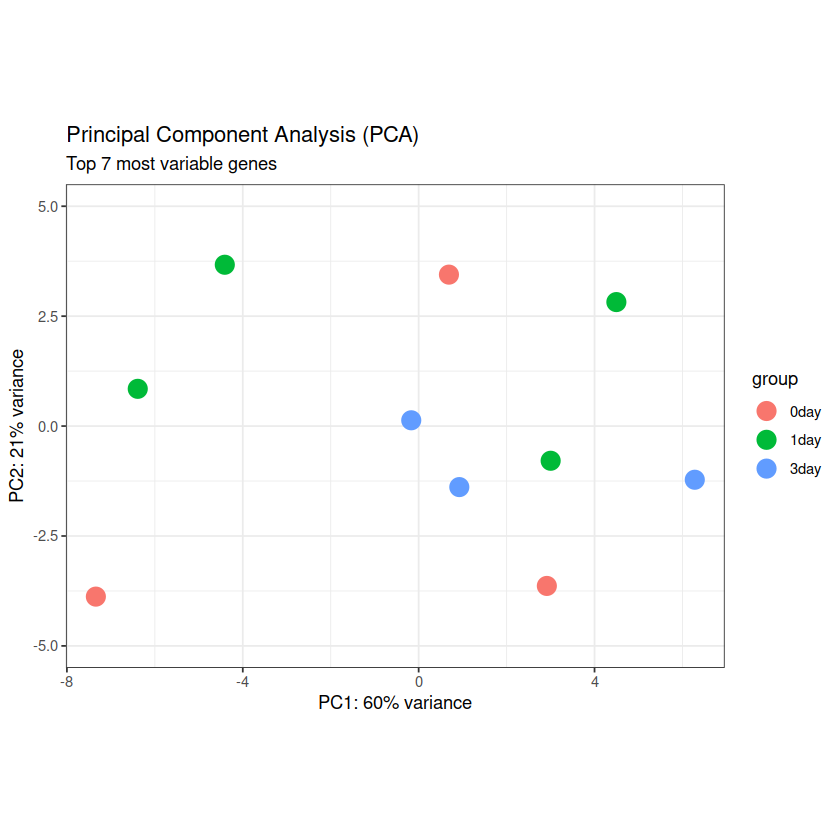

In [51]:
# Convert all samples to rlog
ddsMat_rlog <- rlog(ddsMat, blind = FALSE)

# Plot PCA by column variable
plotPCA(ddsMat_rlog, intgroup = "Group", ntop = 7) +
  theme_bw() + # remove default ggplot2 theme
  geom_point(size = 5) + # Increase point size
  scale_y_continuous(limits = c(-5, 5)) + # change limits to fix figure dimensions
  ggtitle(label = "Principal Component Analysis (PCA)", 
          subtitle = "Top 7 most variable genes") 

In [55]:
results_sig <- subset(results, padj < 0.05)
head(results_sig)

log2 fold change (MLE): Group 3day vs 0day 
Wald test p-value: Group 3day vs 0day 
DataFrame with 6 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
gene-AT1G04107   18.9625        7.38042  1.367202   5.39819 6.73167e-08
gene-AT1G18250  108.4208        2.30075  0.530006   4.34098 1.41847e-05
gene-AT1G23300  151.6202        2.18012  0.458994   4.74979 2.03631e-06
gene-AT1G55020   23.6957       -3.94196  0.797412  -4.94344 7.67547e-07
gene-AT1G68250  192.9029       -6.19033  1.096513  -5.64546 1.64737e-08
gene-AT1G74670   29.8108       -6.72502  1.523597  -4.41391 1.01519e-05
                      padj
                 <numeric>
gene-AT1G04107 0.001044520
gene-AT1G18250 0.031442491
gene-AT1G23300 0.012392853
gene-AT1G55020 0.006604426
gene-AT1G68250 0.000511228
gene-AT1G74670 0.026253532

In [67]:
library(RColorBrewer)
library(viridisLite)
library(viridis)

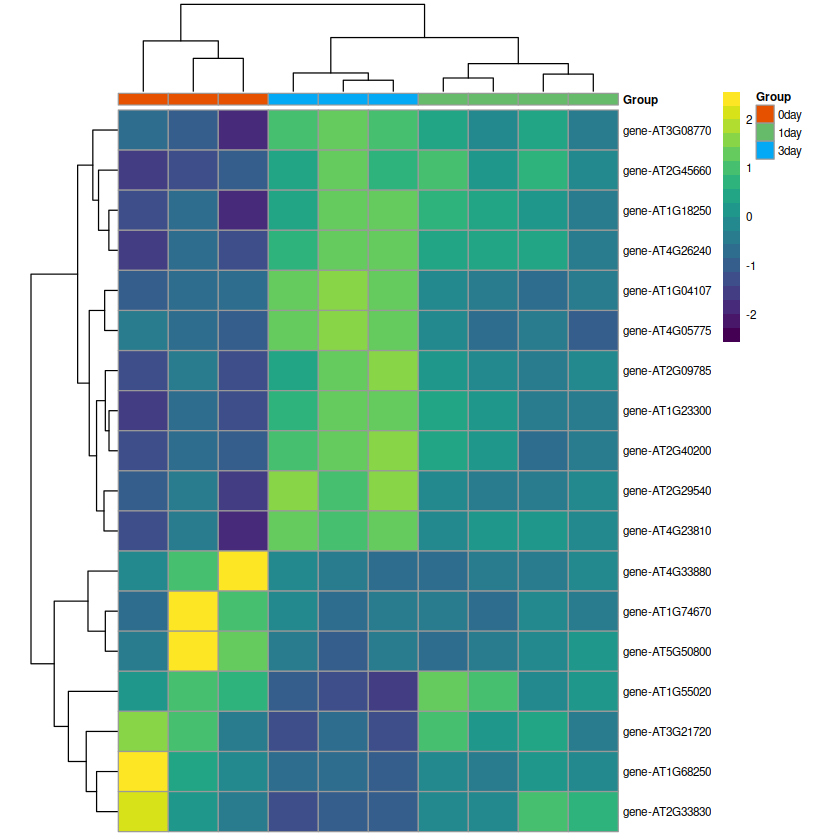

In [91]:

ddsMat_rlog <- rlog(ddsMat, blind = FALSE)
mat <- assay(ddsMat_rlog[row.names(results_sig)])[1:18, ]

##


annotation_col = data.frame(
  Group = factor(colData(ddsMat_rlog)$Group), 
  row.names = colData(ddsMat_rlog)$sampleid
)

##



ann_colors = list(
  Group = c("0day" = "#E65100", "1day" = "#66BB6A", "3day" = "#03A9F4"), 
  sampleid= c(a = "red")  
)

##

pheatmap(mat = mat, 
         color = viridis(18), 
         scale = "row", # Scale genes to Z-score (how many standard deviations)
         annotation_col = annotation_col, # Add multiple annotations to the samples
         annotation_colors = ann_colors,# Change the default colors of the annotations
         fontsize = 7, # Make fonts smaller
         cellwidth = 30, # Make the cells wider
         show_colnames = F)



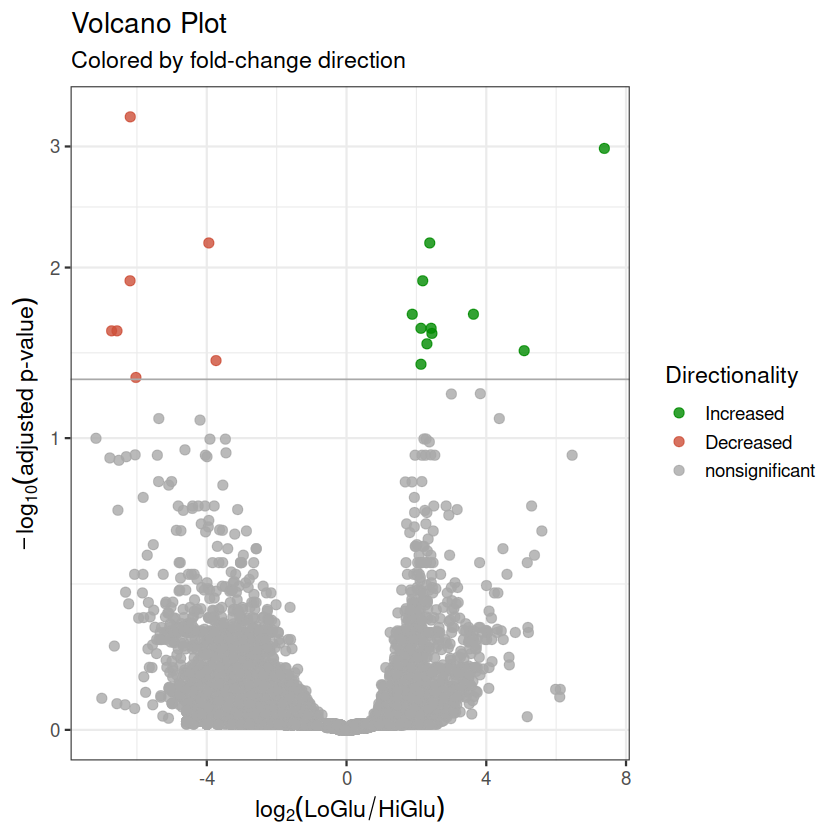

In [92]:
# Gather Log-fold change and FDR-corrected pvalues from DESeq2 results
## - Change pvalues to -log10 (1.3 = 0.05)
data <- data.frame(gene = row.names(results),
                   pval = -log10(results$padj), 
                   lfc = results$log2FoldChange)

# Remove any rows that have NA as an entry
data <- na.omit(data)

# Color the points which are up or down
## If fold-change > 0 and pvalue > 1.3 (Increased significant)
## If fold-change < 0 and pvalue > 1.3 (Decreased significant)
data <- mutate(data, color = case_when(data$lfc > 0 & data$pval > 1.3 ~ "Increased",
                                       data$lfc < 0 & data$pval > 1.3 ~ "Decreased",
                                       data$pval < 1.3 ~ "nonsignificant"))

# Make a basic ggplot2 object with x-y values
vol <- ggplot(data, aes(x = lfc, y = pval, color = color))

# Add ggplot2 layers
vol +   
  ggtitle(label = "Volcano Plot", subtitle = "Colored by fold-change direction") +
  geom_point(size = 2.5, alpha = 0.8, na.rm = T) +
  scale_color_manual(name = "Directionality",
                     values = c(Increased = "#008B00", Decreased = "#CD4F39", nonsignificant = "darkgray")) +
  theme_bw(base_size = 14) + # change overall theme
  theme(legend.position = "right") + # change the legend
  xlab(expression(log[2]("LoGlu" / "HiGlu"))) + # Change X-Axis label
  ylab(expression(-log[10]("adjusted p-value"))) + # Change Y-Axis label
  geom_hline(yintercept = 1.3, colour = "darkgrey") + # Add p-adj value cutoff line
  scale_y_continuous(trans = "log1p") # Scale yaxis due to large p-v

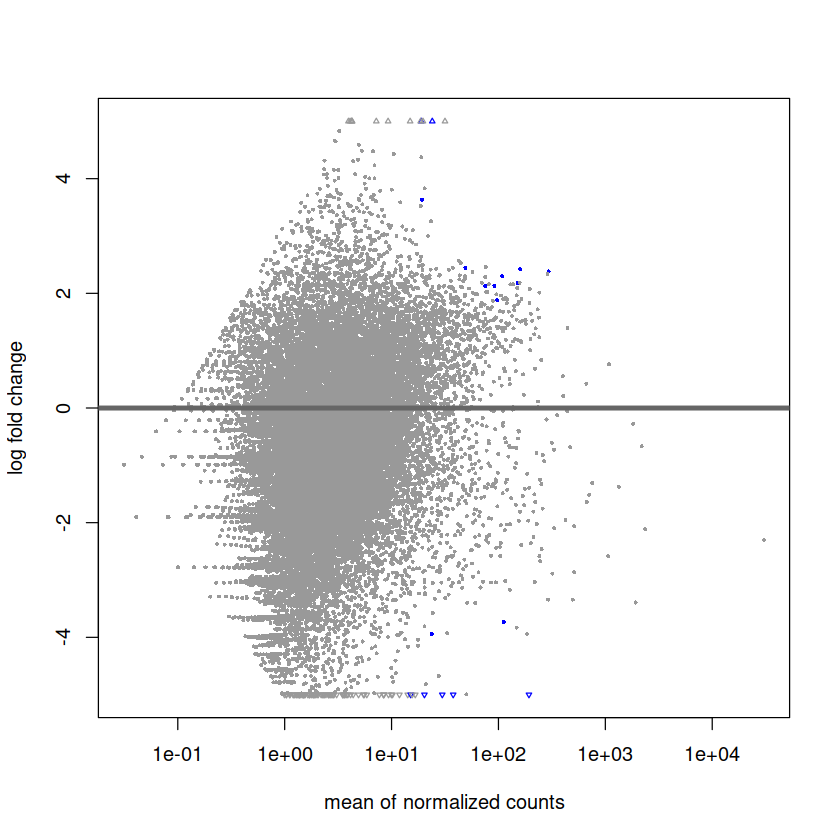

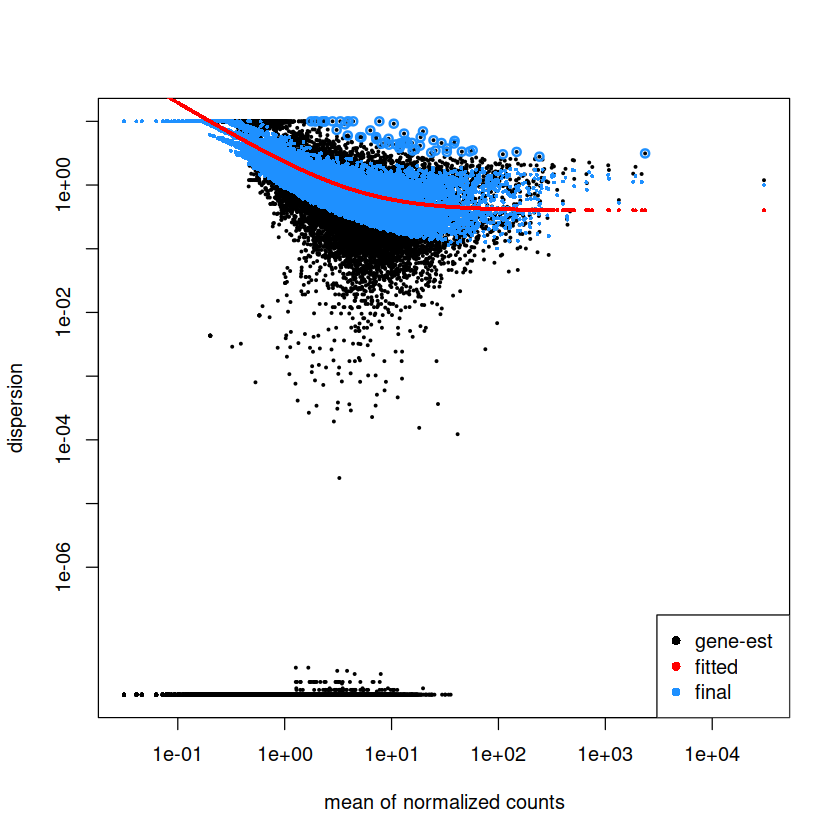

In [86]:
plotMA(results, ylim = c(-5, 5))
plotDispEsts(ddsMat)

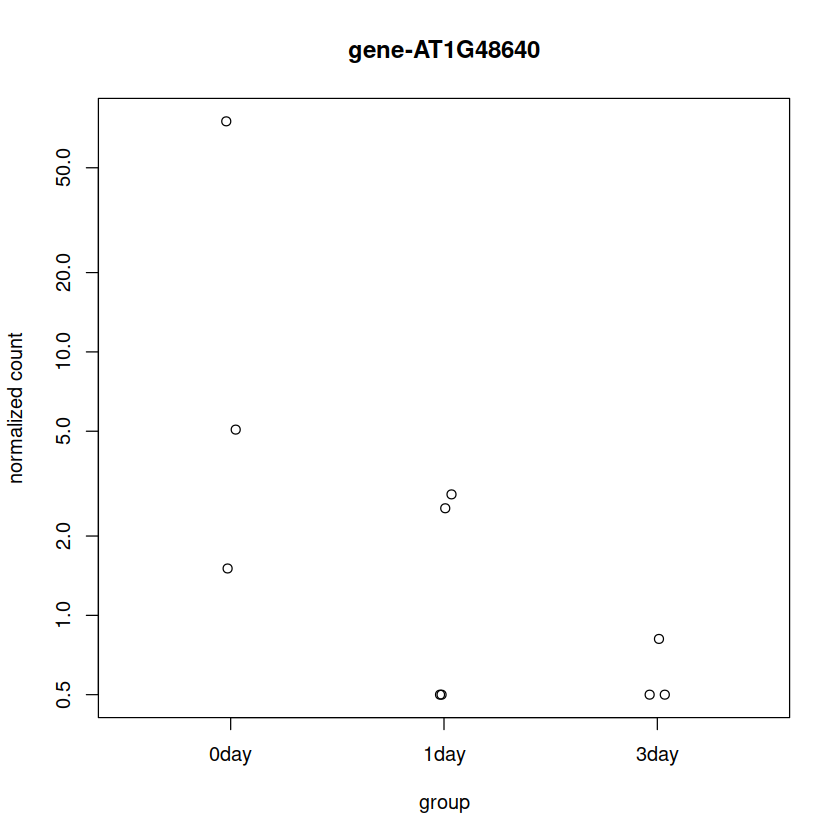

In [93]:
# Convert all samples to rlog
ddsMat_rlog <- rlog(ddsMat, blind = FALSE)

# Get gene with highest expression
top_gene <- rownames(results)[which.min(results$log2FoldChange)]

# Plot single gene
plotCounts(dds = ddsMat, 
           gene = top_gene, 
           intgroup = "Group", 
           normalized = T, 
           transform = T)